### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?

In [3]:
lista_alumnos = [
    ("Juan Maniglia", 32, 1.75),
    ("Ronald Espinoza", 30, 1.74),
    ("Andres Zaragoza", 31, 1.72),
    ("Abdom Ramirez", 25, 1.72),
    ("Denisia Pelu", 40, 1.75),
    ("Isabel Romo", 20, 1.68),
    ("Nuria Rubio", 18, 1.68),
    ("Javier Sanchez", 35, 1.79),
    ("Sergio Garcia", 25, 1.73),
    ("Jose Villaroel", 32, 1.79),
    ("Angel Villanueva", 44, 1.74),
    ("Felipe Alvin", 38, 1.80),
    ("Gabriel Gonzalez", 33, 1.74),
    ("Samuel Tuna", 42, 1.78),
    ("Kimberly Fernandez", 45, 1.75)
]

In [4]:
import pandas as pd

In [9]:
df = pd.DataFrame(lista_alumnos, columns=["Nombre", "Edad", "Altura"])
df

,Nombre,Edad,Altura
0,Juan Maniglia,32,1.75
1,Ronald Espinoza,30,1.74
2,Andres Zaragoza,31,1.72
3,Abdom Ramirez,25,1.72
4,Denisia Pelu,40,1.75
5,Isabel Romo,20,1.68
6,Nuria Rubio,18,1.68
7,Javier Sanchez,35,1.79
8,Sergio Garcia,25,1.73
9,Jose Villaroel,32,1.79


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nombre  15 non-null     object 
 1   Edad    15 non-null     int64  
 2   Altura  15 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 492.0+ bytes


In [11]:
df.describe()

,Edad,Altura
count,15.000000,15.000000
mean,32.666667,1.744000
std,8.277911,0.036214
min,18.000000,1.680000
25%,27.500000,1.725000
50%,32.000000,1.740000
75%,39.000000,1.765000
max,45.000000,1.800000


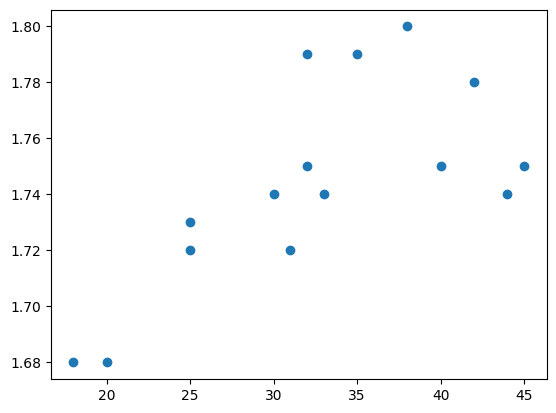

In [12]:
import matplotlib.pyplot as plt

plt.scatter(df['Edad'],df['Altura'])

<Axes: >

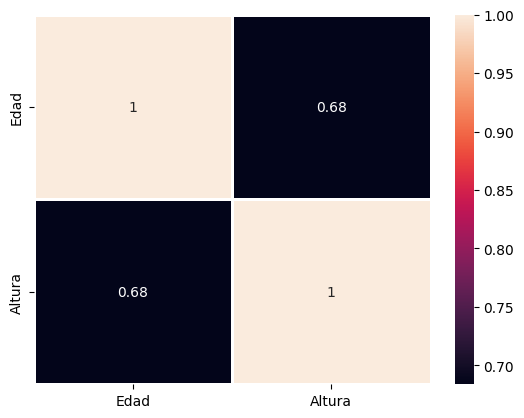

In [18]:
import seaborn as sns
corr = df[["Edad", "Altura"]].corr()

sns.heatmap(corr, annot=True, linewidths=2)

C:\Users\anoni\AppData\Local\Temp\ipykernel_15700\1025652608.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Altura']);


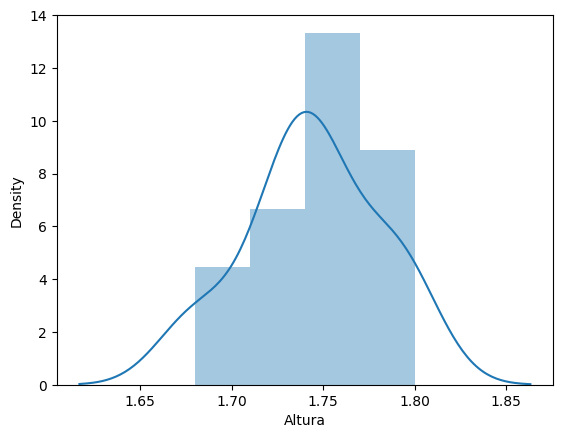

In [19]:
sns.distplot(df['Altura']);

In [20]:
X = df[["Edad"]]  
y = df["Altura"]   

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (15, 1)
Train features shape: (12, 1)
Train target shape: (12,)
Test features shape: (3, 1)
Test target shape: (3,)


In [23]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [24]:
print(modelo.intercept_, modelo.coef_)

1.6455204594400574 [0.00276741]


(Altura) = 1.85 - 0.0041*(Edad)

In [25]:
# Prediccion
modelo.predict(X_test)

array([1.73407753, 1.75068198, 1.73407753])

In [26]:
df_test = pd.DataFrame(X_test)
df_test

,Edad
9,32
11,38
0,32


In [27]:
df_test = pd.DataFrame(X_test)
df_test['predict_height'] = modelo.predict(X_test)
df_test

,Edad,predict_height
9,32,1.734078
11,38,1.750682
0,32,1.734078


In [28]:
df_test['real_height'] = y_test
df_test

,Edad,predict_height,real_height
9,32,1.734078,1.79
11,38,1.750682,1.80
0,32,1.734078,1.75


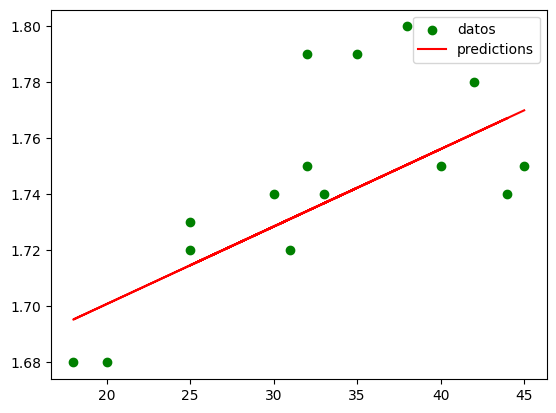

In [29]:
plt.scatter(df['Edad'], df['Altura'], color='g', label="datos");
plt.plot(df['Edad'], modelo.predict(X), color='r', label="predictions");
plt.legend()
# plt.xlim(0,45)

In [30]:
modelo.score(X,y)

0.41171705755440224

In [31]:
df_test

,Edad,predict_height,real_height
9,32,1.734078,1.79
11,38,1.750682,1.80
0,32,1.734078,1.75


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

In [34]:
y_pred = modelo.predict(X_test)

In [43]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 0.040387652548456554
MSE: 0.0019377048645270586
RMSE: 0.04401936919728699


In [45]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print('MAPE:', mape)

MAPE: 0.02257968543995646


In [36]:
modelo.predict([[85]])

c:\Users\anoni\AppData\Local\pypoetry\Cache\virtualenvs\bootcamp-ds-R6wI3bVx-py3.11\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.88075018])

In [37]:
df_test

,Edad,predict_height,real_height
9,32,1.734078,1.79
11,38,1.750682,1.80
0,32,1.734078,1.75


In [46]:
df_test = X_test.copy()  

In [47]:
df_test = pd.DataFrame({
    "Edad": X_test["Edad"].values,  
    "Predict_Height": y_pred,       
    "Real_Height": y_test.values,   
    "Error": abs(y_test.values - y_pred)  
})


In [48]:
df_test

,Edad,Predict_Height,Real_Height,Error
0,32,1.734078,1.79,0.055922
1,38,1.750682,1.80,0.049318
2,32,1.734078,1.75,0.015922


In [50]:
df_test['Error'].mean()

np.float64(0.040387652548456554)

In [52]:
df_test["Error_Cuadratico"] = (df_test["Real_Height"] - df_test["Predict_Height"]) ** 2
df_test

,Edad,Predict_Height,Real_Height,Error,Error_Cuadratico
0,32,1.734078,1.79,0.055922,0.003127
1,38,1.750682,1.80,0.049318,0.002432
2,32,1.734078,1.75,0.015922,0.000254


In [53]:
df_test['Error_Cuadratico'].mean()

np.float64(0.0019377048645270586)

In [54]:
np.sqrt(df_test['Error_Cuadratico'].mean())

np.float64(0.04401936919728699)

In [55]:
df_test['Error'].mean()/df_test['Real_Height'].mean()

np.float64(0.02268969244295312)